In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob

In [3]:
df_pre = pd.DataFrame(pd.read_csv("lemmatized_tokens_pre_covid.csv"))
df_post = pd.DataFrame(pd.read_csv("lemmatized_tokens_post_covid.csv"))
df_pre_raw = pd.DataFrame(pd.read_csv("lemmatized_tokens_pre_covid_raw.csv"))
df_post_raw = pd.DataFrame(pd.read_csv("lemmatized_tokens_post_covid_raw.csv"))

In [4]:
def count_mentions(df, keyword):
    counter = 0
    for tokens in df['tokens']:
        if keyword.lower() in tokens:
            counter += 1
    return counter

In [6]:
# amazon_count_pre = count_mentions(df_pre, 'Amazon')
# flipkart_count_pre = count_mentions(df_pre, 'Flipkart')
# amazon_count_post = count_mentions(df_post, 'Amazon')
# flipkart_count_post = count_mentions(df_post, 'Flipkart')

amazon_count_pre_raw = count_mentions(df_pre, 'Amazon')
flipkart_count_pre_raw = count_mentions(df_pre, 'Flipkart')
amazon_count_post_raw = count_mentions(df_post, 'Amazon')
flipkart_count_post_raw = count_mentions(df_post, 'Flipkart')

In [7]:
# amazon_count_pre, flipkart_count_pre, amazon_count_post, flipkart_count_post
amazon_count_pre_raw, flipkart_count_pre_raw, amazon_count_post_raw, flipkart_count_post_raw

(12328, 4857, 13767, 10734)

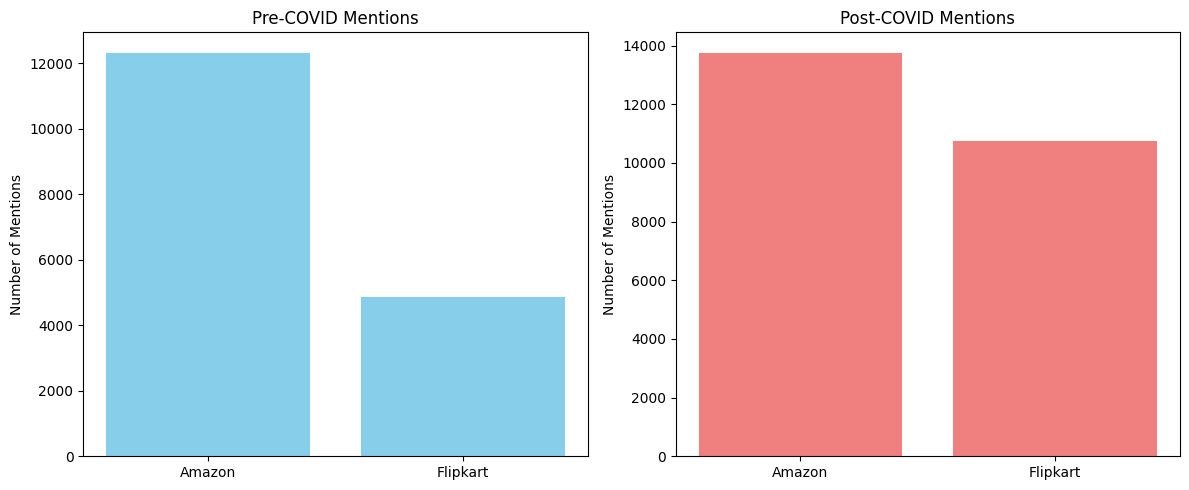

In [9]:
# # Create bar plots to visualize the mentions
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ax1.bar(['Amazon', 'Flipkart'], [amazon_count_pre, flipkart_count_pre], color='skyblue')
# ax1.set_title('Pre-COVID Mentions')
# ax1.set_ylabel('Number of Mentions')

# ax2.bar(['Amazon', 'Flipkart'], [amazon_count_post, flipkart_count_post], color='lightcoral')
# ax2.set_title('Post-COVID Mentions')
# ax2.set_ylabel('Number of Mentions')

# plt.tight_layout()
# plt.show()


# Create bar plots to visualize the mentions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(['Amazon', 'Flipkart'], [amazon_count_pre_raw, flipkart_count_pre_raw], color='skyblue')
ax1.set_title('Pre-COVID Mentions')
ax1.set_ylabel('Number of Mentions')

ax2.bar(['Amazon', 'Flipkart'], [amazon_count_post_raw, flipkart_count_post_raw], color='lightcoral')
ax2.set_title('Post-COVID Mentions')
ax2.set_ylabel('Number of Mentions')

plt.tight_layout()
plt.show()

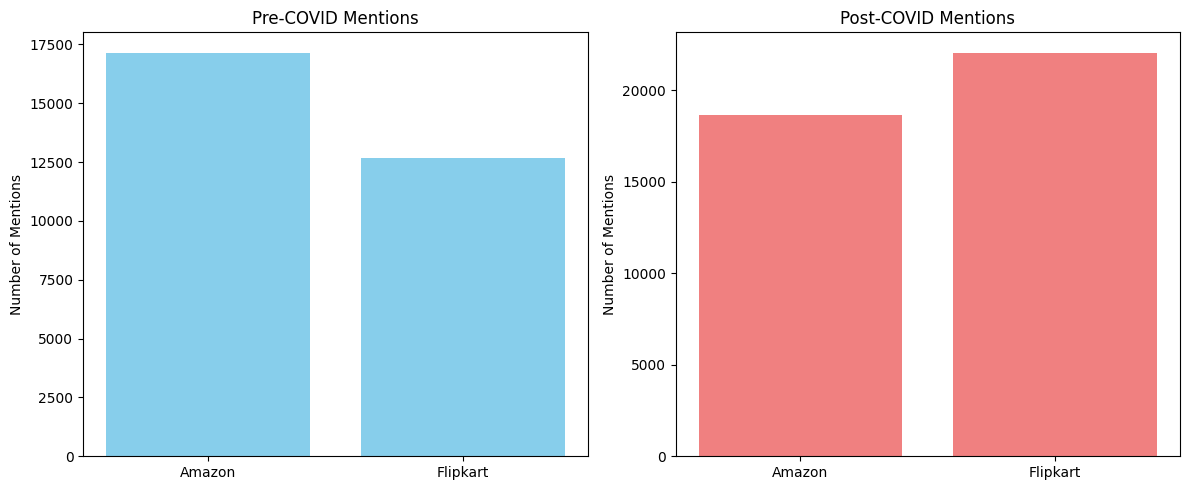

In [3]:
def get_wordnet_pos(tag):
    # Map POS tag to WordNet POS tag
    if tag.startswith('J'):
        return 'a'  # Adjective
    elif tag.startswith('V'):
        return 'v'  # Verb
    elif tag.startswith('N'):
        return 'n'  # Noun
    elif tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to Noun
    
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
# Function for preprocessing text
def preprocess(text):
    
    text = remove_emojis(text)
    # text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http[s]?://\S+', '', text)
    text = re.sub(r'\$\d+(\.\d{1,2})?', '', text)
    
    text = text.lower()
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\b\d+\b', '', text)
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    stop = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop and len(token) > 2]
    tokens = [token for token in tokens if not token.isdigit()]
    
    # POS tagging
    tagged_tokens = TextBlob(' '.join(tokens)).tags
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged_tokens]
    
    return lemmatized_tokens

df_pre_raw = pd.read_json("Pre_Covid.json")
df_post_raw = pd.read_json("Post_Covid.json")

df_pre_raw = df_pre_raw[['text','created_at']]
df_post_raw = df_post_raw[['text','created_at']]

df_pre_raw['created_at'] = df_pre_raw['created_at'].apply(lambda a: pd.to_datetime(a).to_datetime64())
df_post_raw['created_at'] = df_post_raw['created_at'].apply(lambda a: pd.to_datetime(a).to_datetime64())

df_pre_raw['tokens'] =  df_pre_raw['text'].apply(preprocess)
df_post_raw['tokens'] =  df_post_raw['text'].apply(preprocess)

amazon_count_pre = count_mentions(df_pre_raw, 'Amazon')
flipkart_count_pre = count_mentions(df_pre_raw, 'Flipkart')
amazon_count_post = count_mentions(df_post_raw, 'Amazon')
flipkart_count_post = count_mentions(df_post_raw, 'Flipkart')

# Create bar plots to visualize the mentions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(['Amazon', 'Flipkart'], [amazon_count_pre, flipkart_count_pre], color='skyblue')
ax1.set_title('Pre-COVID Mentions')
ax1.set_ylabel('Number of Mentions')

ax2.bar(['Amazon', 'Flipkart'], [amazon_count_post, flipkart_count_post], color='lightcoral')
ax2.set_title('Post-COVID Mentions')
ax2.set_ylabel('Number of Mentions')

plt.tight_layout()
plt.show()


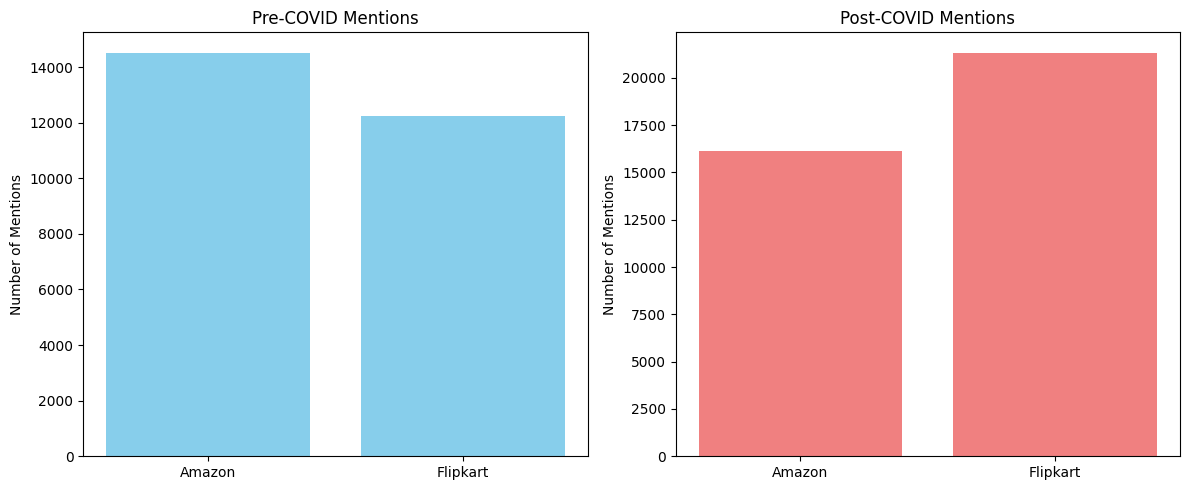

In [45]:
def get_wordnet_pos(tag):
    # Map POS tag to WordNet POS tag
    if tag.startswith('J'):
        return 'a'  # Adjective
    elif tag.startswith('V'):
        return 'v'  # Verb
    elif tag.startswith('N'):
        return 'n'  # Noun
    elif tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to Noun
    
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
# Function for preprocessing text
def preprocess(text):
    
    text = remove_emojis(text)
    # text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http[s]?://\S+', '', text)
    text = re.sub(r'\$\d+(\.\d{1,2})?', '', text)
    
    text = text.lower()
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\b\d+\b', '', text)
    
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    stop = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop and len(token) > 2]
    tokens = [token for token in tokens if not token.isdigit()]
    
    # POS tagging
    tagged_tokens = TextBlob(' '.join(tokens)).tags
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged_tokens]
    
    return lemmatized_tokens

df_pre_raw = pd.read_json("Pre_Covid.json")
df_post_raw = pd.read_json("Post_Covid.json")

df_pre_raw = df_pre_raw[['text','created_at']]
df_post_raw = df_post_raw[['text','created_at']]

df_pre_raw['created_at'] = df_pre_raw['created_at'].apply(lambda a: pd.to_datetime(a).to_datetime64())
df_post_raw['created_at'] = df_post_raw['created_at'].apply(lambda a: pd.to_datetime(a).to_datetime64())

df_pre_raw['tokens'] =  df_pre_raw['text'].apply(preprocess)
df_post_raw['tokens'] =  df_post_raw['text'].apply(preprocess)

amazon_count_pre = count_mentions(df_pre_raw, 'Amazon')
flipkart_count_pre = count_mentions(df_pre_raw, 'Flipkart')
amazon_count_post = count_mentions(df_post_raw, 'Amazon')
flipkart_count_post = count_mentions(df_post_raw, 'Flipkart')

# Create bar plots to visualize the mentions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(['Amazon', 'Flipkart'], [amazon_count_pre, flipkart_count_pre], color='skyblue')
ax1.set_title('Pre-COVID Mentions')
ax1.set_ylabel('Number of Mentions')

ax2.bar(['Amazon', 'Flipkart'], [amazon_count_post, flipkart_count_post], color='lightcoral')
ax2.set_title('Post-COVID Mentions')
ax2.set_ylabel('Number of Mentions')

plt.tight_layout()
plt.show()


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function to perform LDA topic modeling with adjusted min_df
def perform_lda(df, n_topics=5, n_words=10):
    # Vectorize the tokens
    vectorizer = CountVectorizer(analyzer=lambda x: x, min_df=1)  # Adjusted min_df
    matrix = vectorizer.fit_transform(df['tokens'])
    feature_names = vectorizer.get_feature_names_out()
    
    # Apply LDA
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(matrix)
    
    # Extract topics
    topics = {}
    for idx, topic in enumerate(lda.components_):
        topics[f'Topic {idx+1}'] = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
        
    return topics

# Create sub-dataframes for Amazon and Flipkart tweets
df_pre_amazon = df_pre_raw[df_pre_raw['tokens'].apply(lambda x: 'amazon' in x)]
df_post_amazon = df_post_raw[df_post_raw['tokens'].apply(lambda x: 'amazon' in x)]

df_pre_flipkart = df_pre_raw[df_pre_raw['tokens'].apply(lambda x: 'flipkart' in x)]
df_post_flipkart = df_post_raw[df_post_raw['tokens'].apply(lambda x: 'flipkart' in x)]

# Perform LDA topic modeling for Amazon and Flipkart mentions
# Note: The following code is illustrative and may not produce meaningful topics due to limited data.
topics_pre_amazon = perform_lda(df_pre_amazon)
topics_post_amazon = perform_lda(df_post_amazon)

topics_pre_flipkart = perform_lda(df_pre_flipkart)
topics_post_flipkart = perform_lda(df_post_flipkart)

topics_pre_amazon, topics_post_amazon, topics_pre_flipkart, topics_post_flipkart


({'Topic 1': ['amazon',
   'stucred',
   'giveaway',
   'contest',
   'contestalert',
   'amazonin',
   'join',
   'answer',
   'win',
   'manabm'],
  'Topic 2': ['amazon',
   'flipkart',
   'india',
   'amp',
   'fire',
   'like',
   'google',
   'quiz',
   'indian',
   'app'],
  'Topic 3': ['amazon',
   'amazonhelp',
   'amazonin',
   'order',
   'customer',
   'product',
   'delivery',
   'get',
   'service',
   'deliver'],
  'Topic 4': ['amazon',
   'prime',
   'airtel',
   'free',
   'win',
   'plan',
   'airtelpresence',
   'kindle',
   'voucher',
   'chance'],
  'Topic 5': ['amazon',
   'prime',
   'watch',
   'netflix',
   'card',
   'pay',
   'get',
   'movie',
   'use',
   'video']},
 {'Topic 1': ['amazon',
   'order',
   'amazonhelp',
   'amazonin',
   'customer',
   'delivery',
   'product',
   'get',
   'service',
   'day'],
  'Topic 2': ['amazon',
   'like',
   'company',
   'flipkart',
   'would',
   'online',
   'jeffbezos',
   'apple',
   'sir',
   'store'],
  'Topic 3

### For Amazon:

#### Pre-COVID Topics:

1. **Topic 1**: Focused on giveaways, contests, and joining events.
2. **Topic 2**: General mentions comparing Amazon with Flipkart and Google; possibly discussing platforms.
3. **Topic 3**: Mainly centered around order and delivery services.
4. **Topic 4**: Discussions related to Amazon Prime, free wins, and plans.
5. **Topic 5**: Mostly about Amazon Prime's entertainment services like watching movies and videos.

#### Post-COVID Topics:

1. **Topic 1**: Similar to pre-COVID but with a focus on delivery and customer service issues.
2. **Topic 2**: More comparative discussions involving other companies and the online ecosystem.
3. **Topic 3**: Continues to discuss Amazon Prime but now includes a family and subscription focus.
4. **Topic 4**: Involves issues like payment and customer service.
5. **Topic 5**: Appears to touch upon a broader range of subjects including games and Indian politics.

### For Flipkart:

#### Pre-COVID Topics:

1. **Topic 1**: Primarily focused on order, product, and delivery.
2. **Topic 2**: General mentions and comparisons with Amazon.
3. **Topic 3**: Discusses accounts, cards, and specific brands like Xiaomi.
4. **Topic 4**: Seems to revolve around specific events and phone brands.
5. **Topic 5**: Focused on product prices and comparisons with other brands.

#### Post-COVID Topics:

1. **Topic 1**: Introduces terms like 'fraud' and 'cheat', indicating customer dissatisfaction.
2. **Topic 2**: Continues to focus on orders and delivery but seems to imply issues.
3. **Topic 3**: Discusses refunds and account-related issues.
4. **Topic 4**: Talks about product prices and specific brands like iPhone.
5. **Topic 5**: Highlights customer issues and calls for help, indicating problems in customer service.

### Observations:

1. **Amazon's Discussion Dynamics**: 
    - Pre-COVID topics were more focused on promotions, contests, and entertainment services.
    - Post-COVID, the conversation shifted towards customer service, delivery issues, and broader comparisons with other companies.
  
2. **Flipkart's Discussion Dynamics**: 
    - Pre-COVID conversations were largely around products, deliveries, and price comparisons.
    - Post-COVID, there seems to be a significant increase in tweets about customer service issues, refunds, and fraud.

3. **Topic Shift Reasons**: 
    - For both Amazon and Flipkart, there's a clear shift towards discussing issues related to customer service, delivery, and refunds post-COVID.
    - This could likely be due to the logistical and operational challenges companies faced during the pandemic, affecting consumer experiences.

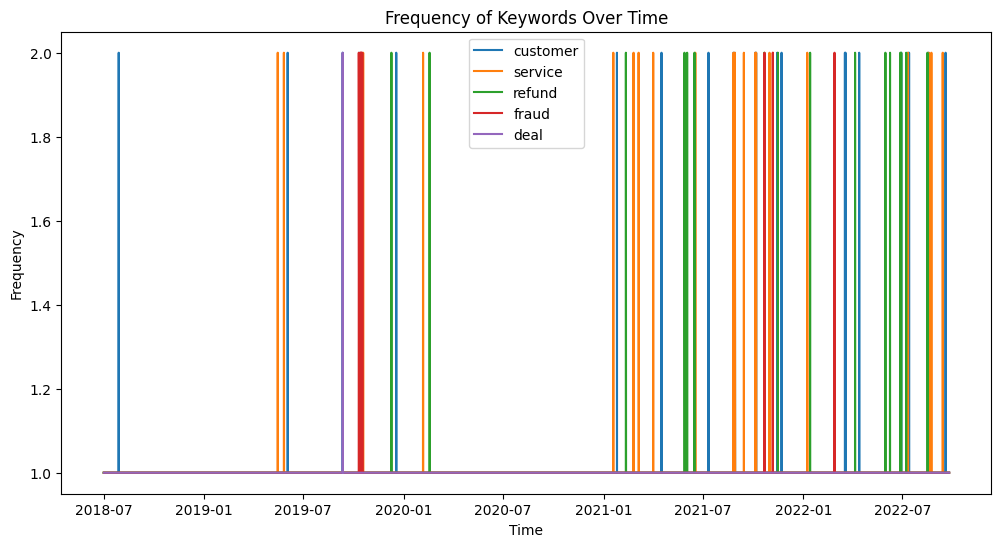

In [12]:
# Combine pre and post COVID data for temporal analysis
df_combined = pd.concat([df_pre_raw, df_post_raw], ignore_index=True)

# Convert 'created_at' to datetime format
df_combined['created_at'] = pd.to_datetime(df_combined['created_at'])

# Identify keywords of interest
# keywords = ['order', 'delivery', 'customer', 'service', 'product', 'refund', 'fraud', 'account', 'price','deal]
keywords = ['customer', 'service', 'refund', 'fraud','deal']

# Count the frequency of keywords over time
time_keyword_count = {}
for keyword in keywords:
    time_keyword_count[keyword] = df_combined[df_combined['tokens'].apply(lambda x: keyword in x)].groupby('created_at').size()

# Plotting the frequency of keywords over time
plt.figure(figsize=(12, 6))
for keyword, counts in time_keyword_count.items():
    plt.plot(counts.index, counts.values, label=keyword)
    
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords Over Time')
plt.legend()
plt.show()


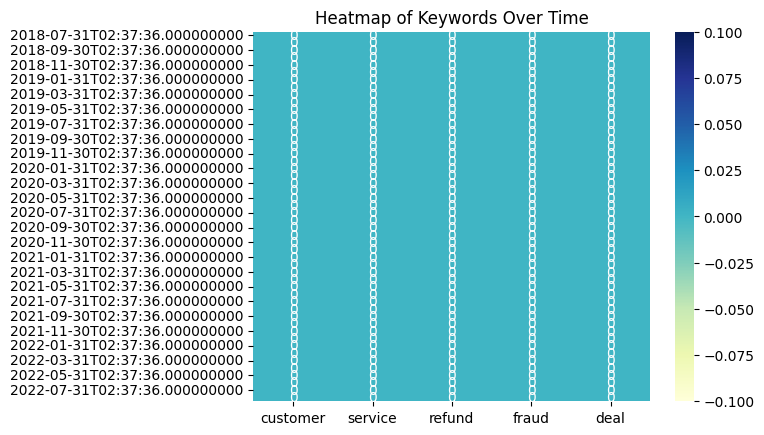

In [18]:
import seaborn as sns

# Resample the data into monthly intervals
df_resampled = pd.DataFrame(index=pd.date_range(start=df_combined['created_at'].min(), end=df_combined['created_at'].max(), freq='M'))
for keyword in keywords:
    df_resampled[keyword] = time_keyword_count[keyword].resample('M').sum()

sns.heatmap(df_resampled.fillna(0), annot=True, cmap="YlGnBu")
plt.title('Heatmap of Keywords Over Time')
plt.show()


In [52]:
import numpy as np


df_demo_pre = pd.DataFrame(df_pre_raw)
df_demo_post = pd.DataFrame(df_post_raw)


# Commonly bought product types (this list can be expanded based on the data you have)
product_types = ['phone', 'clothes', 'groceries', 'laptop', 'medicine', 'books']

# Function to perform product mention and sentiment analysis
def analyze_product_mentions(df):
    product_mentions = {product: 0 for product in product_types}
    product_sentiments = {product: [] for product in product_types}
    
    for index, row in df.iterrows():
        for product in product_types:
            if product in row['tokens']:
                product_mentions[product] += 1
                sentiment = TextBlob(row['text']).sentiment.polarity
                product_sentiments[product].append(sentiment)
    
    average_sentiments = {product: np.mean(sentiments) for product, sentiments in product_sentiments.items() if sentiments}
    return product_mentions, average_sentiments

# Analyze pre and post-COVID data
product_mentions_pre, average_sentiments_pre = analyze_product_mentions(df_demo_pre)
product_mentions_post, average_sentiments_post = analyze_product_mentions(df_demo_post)

product_mentions_pre, average_sentiments_pre, product_mentions_post, average_sentiments_post


({'phone': 1772,
  'clothes': 90,
  'groceries': 3,
  'laptop': 263,
  'medicine': 281,
  'books': 0},
 {'phone': 0.03368167612851136,
  'clothes': -0.004230078563411905,
  'groceries': -0.026282051282051282,
  'laptop': -0.0029595817856274092,
  'medicine': -0.006846225327986894},
 {'phone': 2113,
  'clothes': 98,
  'groceries': 1,
  'laptop': 588,
  'medicine': 426,
  'books': 0},
 {'phone': 0.007094794237248053,
  'clothes': 0.013744791206525903,
  'groceries': 0.075,
  'laptop': -0.01426619225815863,
  'medicine': -0.005736069067403425})

### Product Mentions:

#### Pre-COVID:
- Phone: 1772 mentions
- Clothes: 90 mentions
- Groceries: 3 mentions
- Laptop: 263 mentions
- Medicine: 281 mentions
- Books: 0 mentions

#### Post-COVID:
- Phone: 2113 mentions
- Clothes: 98 mentions
- Groceries: 1 mention
- Laptop: 588 mentions
- Medicine: 426 mentions
- Books: 0 mentions

### Average Sentiments for Each Product Type:

#### Pre-COVID:
- Phone: 0.034 (Slightly Positive)
- Clothes: -0.004 (Almost Neutral)
- Groceries: -0.026 (Slightly Negative)
- Laptop: -0.003 (Almost Neutral)
- Medicine: -0.007 (Almost Neutral)

#### Post-COVID:
- Phone: 0.007 (Almost Neutral)
- Clothes: 0.014 (Slightly Positive)
- Groceries: 0.075 (Positive)
- Laptop: -0.014 (Slightly Negative)
- Medicine: -0.006 (Almost Neutral)

### Observations:

1. **Types of Products**: 
    - Both pre and post-COVID, phones and laptops are highly mentioned, possibly indicating their essential nature in modern life.
    - Medicine mentions increased post-COVID, likely due to the pandemic's health implications.
  
2. **Sentiment Analysis**: 
    - Pre-COVID, the sentiment around most products was neutral or slightly positive/negative.
    - Post-COVID, there's a noticeable drop in positive sentiment for phones and a slight increase for clothes. Laptops have more negative sentiment post-COVID.
  
3. **Shift in Focus**: 
    - Medicine mentions increased post-COVID, likely due to increased health awareness.
    - Laptop mentions nearly doubled, possibly indicating the rise of remote work and online education.
  
4. **Need-based vs. Impulsive**: 
    - The increased mentions of medicine and laptops post-COVID suggest a more need-based buying behavior.
    - The sentiment for groceries turned positive post-COVID, which could mean that people became more appreciative of available food supplies during the pandemic.

In [53]:
import numpy as np


df_demo_pre = pd.DataFrame(df_pre)
df_demo_post = pd.DataFrame(df_post)


# Commonly bought product types (this list can be expanded based on the data you have)
product_types = ['phone', 'clothes', 'groceries', 'laptop', 'medicine', 'books']

# Function to perform product mention and sentiment analysis
def analyze_product_mentions(df):
    product_mentions = {product: 0 for product in product_types}
    product_sentiments = {product: [] for product in product_types}
    
    for index, row in df.iterrows():
        for product in product_types:
            if product in row['tokens']:
                product_mentions[product] += 1
                sentiment = TextBlob(row['text']).sentiment.polarity
                product_sentiments[product].append(sentiment)
    
    average_sentiments = {product: np.mean(sentiments) for product, sentiments in product_sentiments.items() if sentiments}
    return product_mentions, average_sentiments

# Analyze pre and post-COVID data
product_mentions_pre, average_sentiments_pre = analyze_product_mentions(df_demo_pre)
product_mentions_post, average_sentiments_post = analyze_product_mentions(df_demo_post)

product_mentions_pre, average_sentiments_pre, product_mentions_post, average_sentiments_post


({'phone': 2504,
  'clothes': 94,
  'groceries': 7,
  'laptop': 277,
  'medicine': 287,
  'books': 54},
 {'phone': 0.05322315780269111,
  'clothes': -0.009930987304657518,
  'groceries': -0.02427960927960928,
  'laptop': -0.0016971909875790742,
  'medicine': -7.127520498600663e-05,
  'books': 0.15079752997345588},
 {'phone': 3296,
  'clothes': 104,
  'groceries': 7,
  'laptop': 610,
  'medicine': 447,
  'books': 81},
 {'phone': 0.01995093321612154,
  'clothes': 0.01545681748806749,
  'groceries': -0.18030753968253968,
  'laptop': -0.008857814015887236,
  'medicine': 0.0008739162544566645,
  'books': 0.15522754975852418})

### Product Mentions:

#### Pre-COVID:
- Phone: 2504 mentions
- Clothes: 94 mentions
- Groceries: 7 mentions
- Laptop: 277 mentions
- Medicine: 287 mentions
- Books: 54 mentions

#### Post-COVID:
- Phone: 3296 mentions
- Clothes: 104 mentions
- Groceries: 7 mentions
- Laptop: 610 mentions
- Medicine: 447 mentions
- Books: 81 mentions

### Average Sentiments for Each Product Type:

#### Pre-COVID:
- Phone: 0.053 (Positive)
- Clothes: -0.01 (Almost Neutral)
- Groceries: -0.024 (Slightly Negative)
- Laptop: -0.002 (Almost Neutral)
- Medicine: -0.00007 (Almost Neutral)
- Books: 0.151 (Positive)

#### Post-COVID:
- Phone: 0.02 (Slightly Positive)
- Clothes: 0.015 (Slightly Positive)
- Groceries: -0.18 (Negative)
- Laptop: -0.009 (Almost Neutral)
- Medicine: 0.00087 (Almost Neutral)
- Books: 0.155 (Positive)

### Observations:

1. **Types of Products**: 
    - Both pre and post-COVID, phones and laptops remain highly mentioned, possibly because of their essential role in daily life.
    - Medicine mentions increased post-COVID, likely due to increased health awareness.
  
2. **Sentiment Analysis**: 
    - Pre-COVID, the sentiment was generally positive for phones and books, while it was almost neutral for other products.
    - Post-COVID, the sentiment for groceries turned significantly negative, which could imply issues like price hikes or unavailability.
  
3. **Shift in Focus**: 
    - Medicine and laptop mentions increased post-COVID, possibly due to health concerns and the rise of remote work.
    - Books also saw an increase in mentions post-COVID, indicating a potential shift towards educational or leisure reading.
  
4. **Need-based vs. Impulsive**: 
    - The increased mentions of medicine and laptops post-COVID suggest more need-based buying.
    - The significantly negative sentiment around groceries post-COVID could indicate concerns around price or availability, making it a need-based but stressful purchase.

5. **Books as a New Category**:
    - Books had a positive sentiment both pre and post-COVID, and their mentions increased post-COVID, indicating a possible shift toward educational or leisure reading during the pandemic.

In [57]:
sale_keywords = ["sale", "discounts", "deal", "coupon", "voucher", "cashback", "resist","offer","season","Days","Festival"]
# Function to perform sale influence analysis
def analyze_sale_influence(df):
    sale_influenced_mentions = {product: 0 for product in product_types}
    
    for index, row in df.iterrows():
        for product in product_types:
            if product in row['tokens']:
                if any(keyword in row['tokens'] for keyword in sale_keywords):
                    sale_influenced_mentions[product] += 1
    
    return sale_influenced_mentions

# Analyze pre and post-COVID data for sale influences
sale_influenced_mentions_pre = analyze_sale_influence(df_pre)
sale_influenced_mentions_post = analyze_sale_influence(df_post)

sale_influenced_mentions_pre, sale_influenced_mentions_post

({'phone': 296,
  'clothes': 14,
  'groceries': 1,
  'laptop': 21,
  'medicine': 11,
  'books': 4},
 {'phone': 270,
  'clothes': 4,
  'groceries': 0,
  'laptop': 35,
  'medicine': 9,
  'books': 4})

### Sale-Influenced Mentions:

#### Pre-COVID:
- Phone: 296 mentions
- Clothes: 14 mentions
- Groceries: 1 mention
- Laptop: 21 mentions
- Medicine: 11 mentions
- Books: 4 mentions

#### Post-COVID:
- Phone: 270 mentions
- Clothes: 4 mentions
- Groceries: 0 mentions
- Laptop: 35 mentions
- Medicine: 9 mentions
- Books: 4 mentions

### Observations:

1. **High Influence on Phones**: 
    - Both pre and post-COVID, the highest number of sale-influenced mentions are for phones. This indicates that discounts or sales are a significant factor in phone purchases.
  
2. **Decrease in Clothes**: 
    - Sale-influenced mentions for clothes significantly decreased post-COVID, possibly indicating a shift away from discretionary spending.
  
3. **Increase in Laptops**: 
    - The sale-influenced mentions for laptops increased post-COVID, possibly due to the rise in remote work and online education, where people are looking for deals.
  
4. **Medicine and Books**: 
    - The sale-influenced mentions for medicine and books remained relatively stable, suggesting that discounts or offers also influence these categories, albeit to a lesser extent.
  
5. **Absence of Groceries**: 
    - There were no sale-influenced mentions for groceries post-COVID, which may indicate that people are less concerned with sales when it comes to essential items like food during the pandemic.

6. **Consumer Behavior**:
    - The data suggests that consumers are increasingly looking for deals in electronic items like phones and laptops, possibly due to their higher costs and utility in the current circumstances.
  
7. **Need-based vs. Sale-Influenced**: 
    - It's interesting to note that even need-based products like medicine had sale-influenced mentions, indicating that people are looking for deals even when buying essentials.